In [66]:
#Import Packages for Linear Regression

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [67]:
#Read the loan prediction csv file into a pandas DataFrame

dataset = pd.read_csv('clean_data.csv')

In [68]:
dataset['TotalIncome']= dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


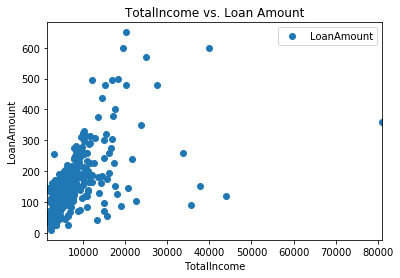

In [69]:
#View dataset/relationship between variables

dataset.plot(x='TotalIncome', y='LoanAmount', style='o')  
plt.title('TotalIncome vs. Loan Amount')  
plt.xlabel('TotalIncome')  
plt.ylabel('LoanAmount')  
plt.show()

In [72]:
# Assign the data to X and y

X = dataset[["TotalIncome"]]
y = dataset["LoanAmount"].values.reshape(-1, 1)
print(X.shape, y.shape)

(542, 1) (542, 1)


In [73]:
#Use train-test_split to create training and testing data --> Split 80% of data to training set; 20% of data to test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
# Create the model using LinearRegression
model = LinearRegression()


In [78]:
#Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train,y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")



Training Score: 0.32398600144187817
Testing Score: 0.303538687141356


In [79]:
lr_prediction = model.predict(X_test)


In [82]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.0079263]]
y-axis intercept:  [90.15289603]


In [83]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [146.41216216]
Predicted output: [136.51382392]
Prediction Error: [-9.89833824]


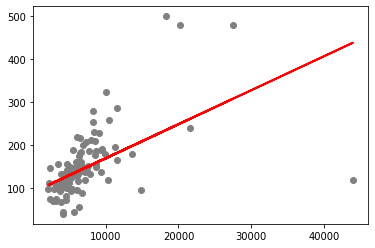

In [84]:
#Plotting line with test data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, lr_prediction, color='red', linewidth=2)
plt.show()

Text(0.5, 1.0, 'Residual Plot')

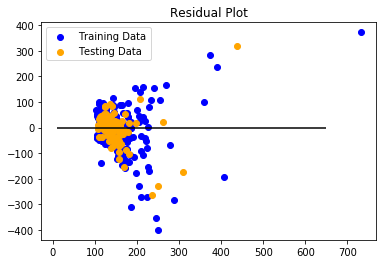

In [85]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [86]:
#Evaluate the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_prediction)))

Mean Absolute Error: 39.06967150692641
Mean Squared Error: 4117.343432858359
Root Mean Squared Error: 64.16652891389995


In [87]:
####Saving the Model: Serialization and Deserialization####


In [88]:
from sklearn.externals import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [89]:
#https://www.datacamp.com/community/tutorials/machine-learning-models-api-python
# The Linear Regression model is now persisted. Now we need to load model back into workspace (Deserialization)

model = joblib.load('model.pkl')